In [34]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline




df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\DP\modernDP\data\liver.csv')
df.shape

(583, 11)

In [35]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [36]:
print(df.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [37]:
df.dtypes[df.dtypes == 'object']

Gender    object
dtype: object

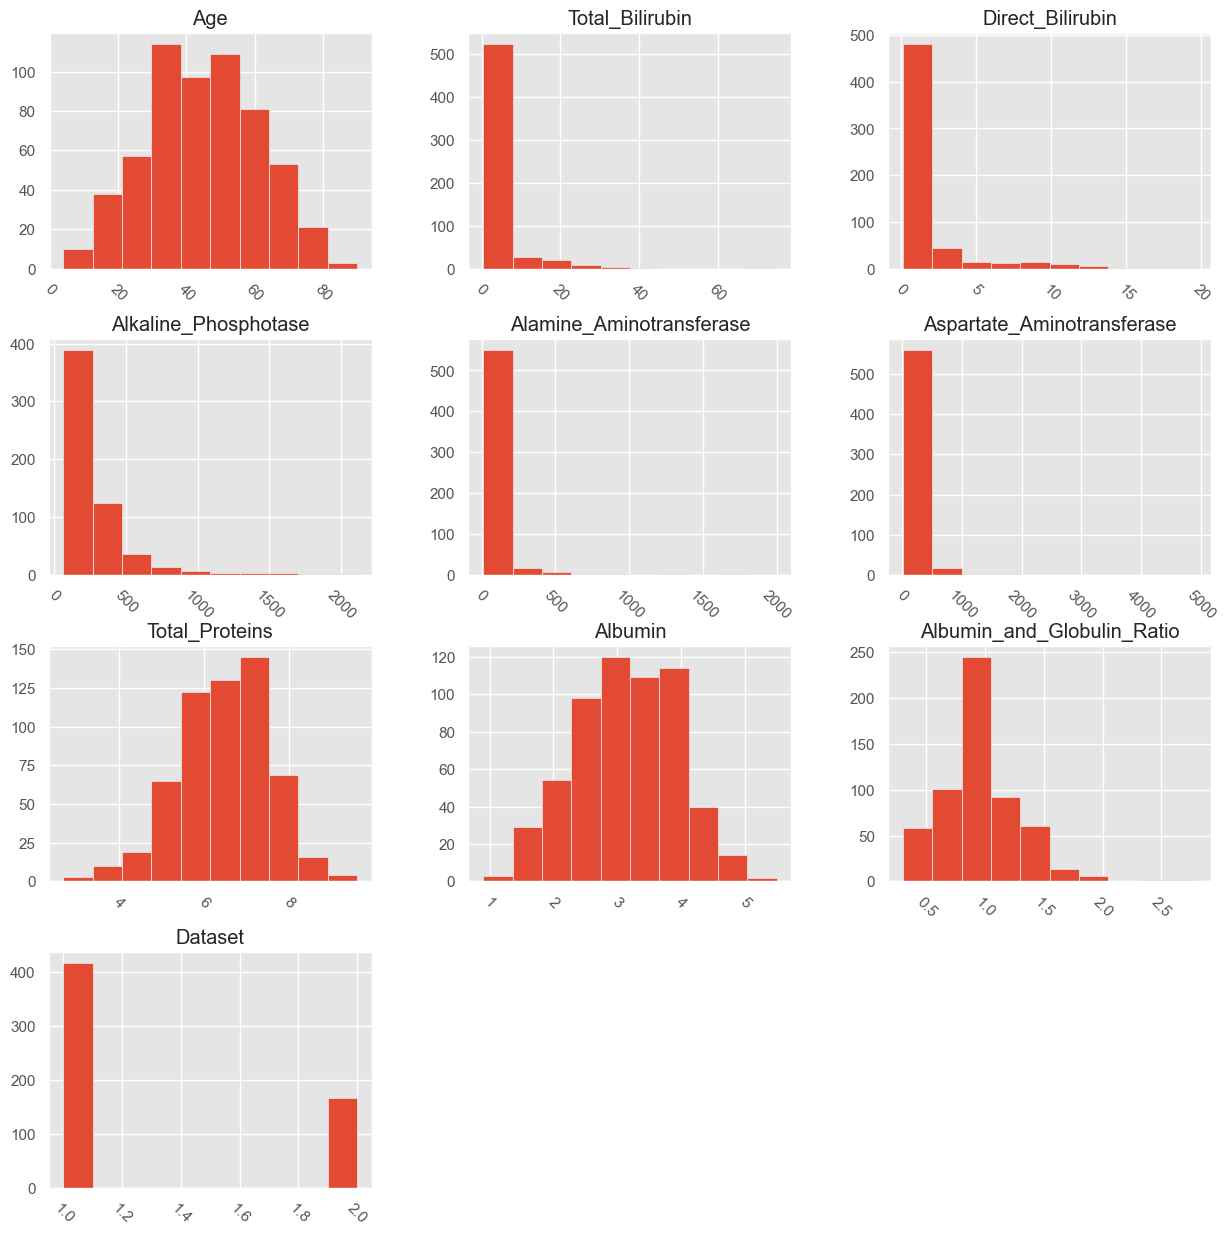

In [38]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

In [39]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [40]:
#if score == negative, mark 0 ; else 1
def partition(x):
    if x== 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [41]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

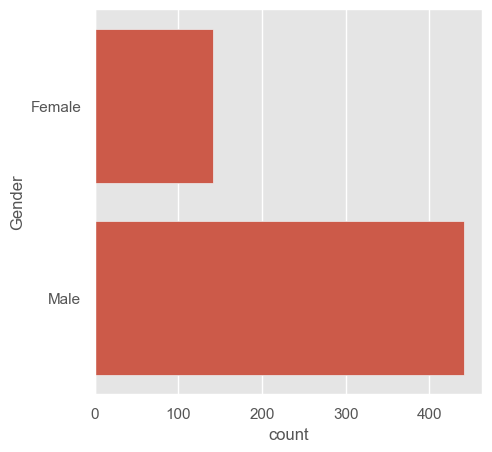

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(y="Gender", data=df)

In [43]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


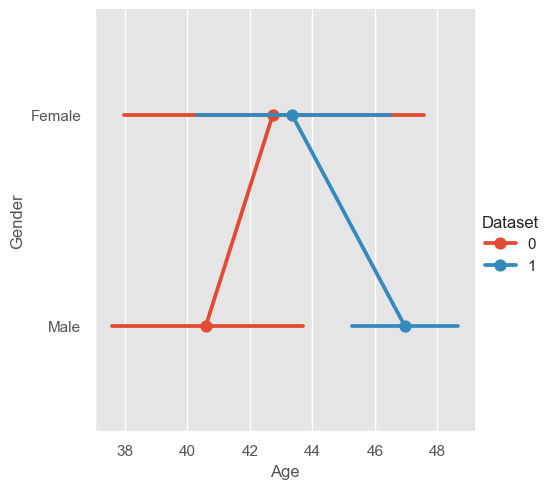

In [44]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df, kind="point", markers="o", linestyles="-")

Number of patients that are male:  441
Number of patients that are female:  142


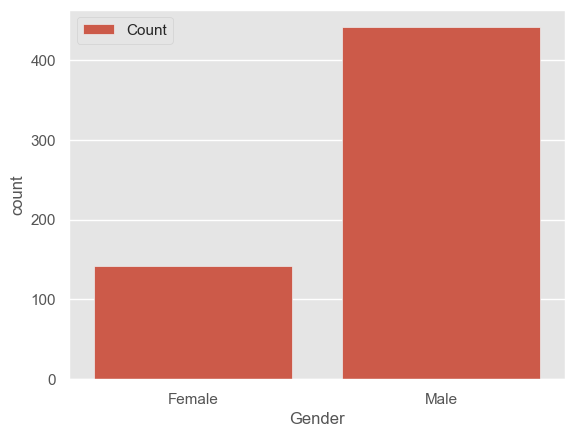

In [45]:
sns.countplot(data=df, x = 'Gender', label='Count')
M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [46]:
#if score == negative, mark 0 ; else 1 
def partition(x):
    if x == 'Male':
        return 0
    return 1
df['Gender'] = df['Gender'].map(partition)

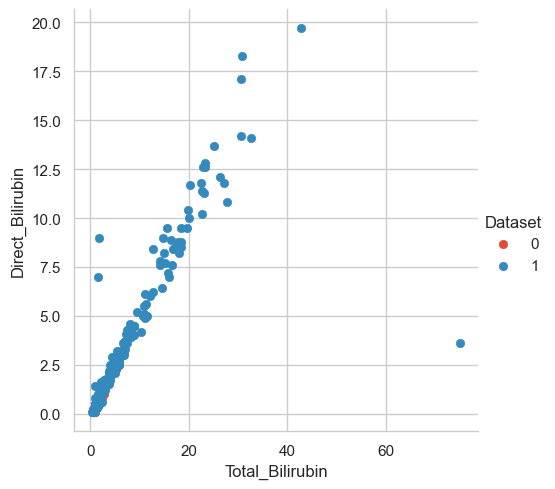

In [47]:
sns.set_style('whitegrid')

g = sns.FacetGrid(df, hue='Dataset', height=5)
g.map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

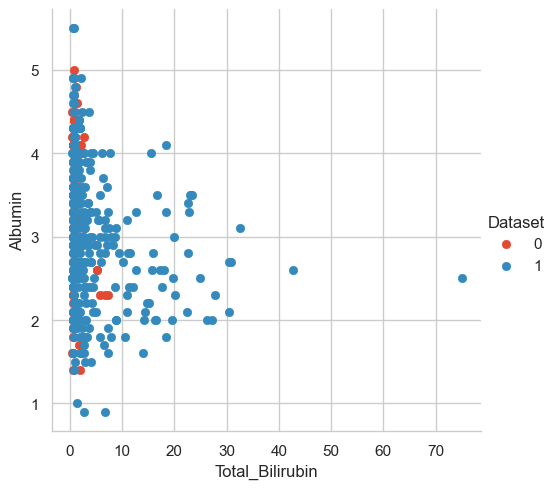

In [49]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter , 'Total_Bilirubin', 'Albumin').add_legend()

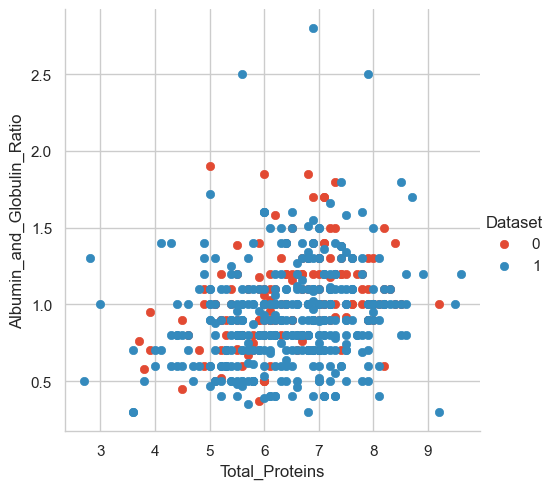

In [50]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Proteins', 'Albumin_and_Globulin_Ratio').add_legend()

Correlations
Finally, let's take a look at the relationships between numeric features and other numeric features.
Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
Correlations near -1 or 1 indicate a strong relationship.
Those closer to 0 indicate a weak relationship.
0 indicates no relationship.

In [51]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Proteins,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

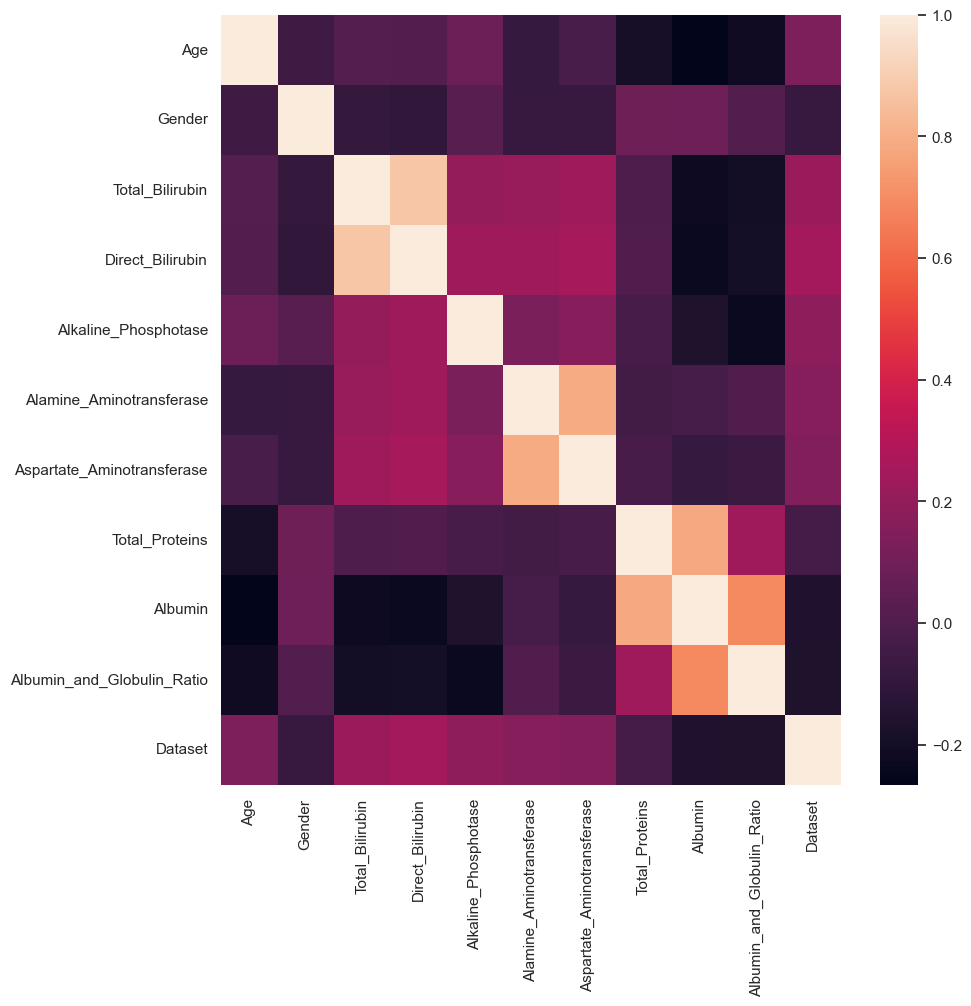

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

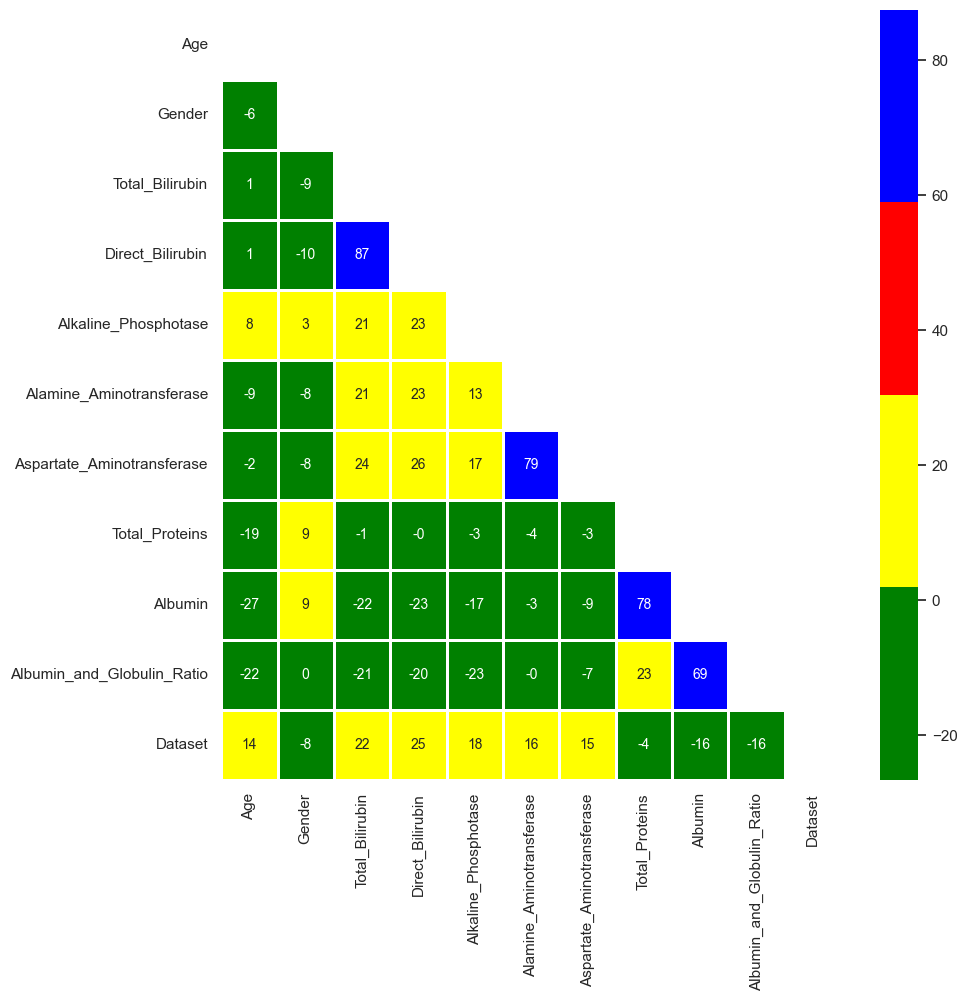

In [53]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr() * 100, mask=mask, fmt = '.0f', annot=True, lw=1 , cmap=ListedColormap(['green', 'yellow', 'red','blue']))

Data Cleaning

In [54]:
df = df.drop_duplicates()
print(df.shape)

(570, 11)


Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

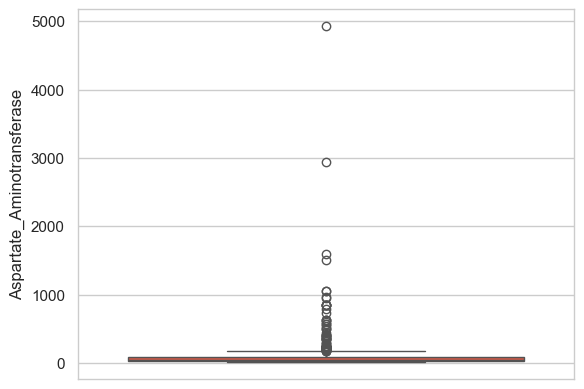

In [56]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [57]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [58]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

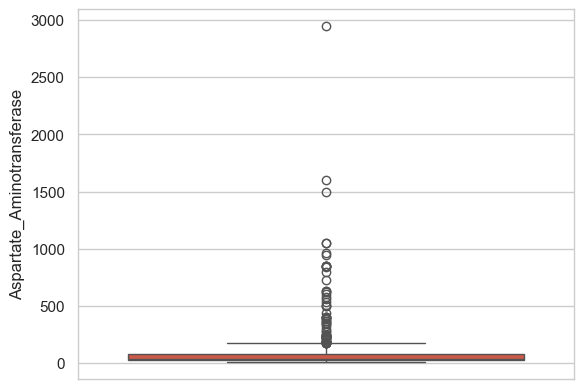

In [59]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [60]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [61]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [63]:
df.isnull().values.any()

True

In [64]:
df=df.dropna(how='any')  

In [66]:
df.shape

(564, 11)

In [68]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Machine Learning Models
Data Preparation

In [71]:
y = df.Dataset
X = df.drop('Dataset', axis=1)

In [72]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [73]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(394, 10) (170, 10) (394,) (170,)


Data Standardization

In [85]:
train_mean = X_train.mean()
train_std = X_train.std()
X_train = (X_train - train_mean) / train_std
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
count,3.940000e+02,3.940000e+02,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,1.803408e-17,1.127130e-17,0.000000,-9.017040e-18,-9.017040e-18,4.508520e-18,1.239843e-17,1.352556e-17,-2.930538e-17,-2.028834e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.609772e+00,-5.473278e-01,-0.457097,-4.967282e-01,-9.478507e-01,-3.999413e-01,-4.728145e-01,-3.285639e+00,-2.750957e+00,-2.057111e+00
25%,-7.944028e-01,-5.473278e-01,-0.396929,-4.623568e-01,-4.750931e-01,-3.207875e-01,-3.922670e-01,-7.312226e-01,-7.405196e-01,-7.644963e-01
50%,1.938343e-02,-5.473278e-01,-0.366846,-4.279853e-01,-3.294669e-01,-2.477225e-01,-3.059663e-01,-1.389277e-03,-1.122579e-01,7.570326e-02
75%,7.705707e-01,-5.473278e-01,-0.111134,-8.427106e-02,4.409605e-02,-9.702594e-02,-7.583080e-02,6.372149e-01,7.673084e-01,5.281184e-01
max,2.460742e+00,1.822421e+00,10.764128,6.240071e+00,7.692639e+00,9.768272e+00,8.669316e+00,2.826715e+00,2.400789e+00,5.052270e+00


In [86]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
count,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,42.976471,2.764706e-01,3.005294,1.362941,299.958824,72.300000,103.594118,6.712941,3.279412,0.975059
std,16.831203,4.485736e-01,5.322168,2.656216,259.944722,134.359046,169.672936,1.042333,0.784381,0.340468
min,6.000000,-2.254260e-17,0.500000,0.100000,90.000000,11.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,-2.254260e-17,0.800000,0.200000,179.250000,23.000000,26.000000,6.100000,2.800000,0.785000
50%,44.500000,-2.254260e-17,0.900000,0.300000,205.500000,35.000000,42.000000,6.900000,3.300000,0.900000
75%,55.000000,1.000000e+00,2.000000,1.050000,298.000000,60.750000,92.000000,7.300000,3.900000,1.175000
max,90.000000,1.000000e+00,27.700000,12.800000,1750.000000,1250.000000,1050.000000,9.600000,5.500000,2.800000


Logistic Regression (LR)

In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
#model prediction
y_pred = lr.predict(X_test)

In [81]:
#accuracy_score
print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test , lr.predict(X_test))
print(lr_acc)

0.7208121827411168
0.711764705882353


In [79]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[  0  49]
 [  0 121]]


In [82]:
#classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170

